In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [49]:
df = pd.read_csv('heart_attack_predictions.csv')

df.head(10)

,Country,Age,Gender,Cholesterol_Level,Blood_Pressure,Smoking_History,Alcohol_Consumption,Physical_Activity,Obesity,Diabetes,...,LDL_Cholesterol,Triglycerides,Heart_Disease_Risk,Medication_Adherence,Urbanization_Level,Air_Pollution_Exposure,Access_To_Healthcare,Education_Level,Income_Level,Heart_Attack_Outcome
0,Germany,39,Male,210.091036,173.301650,Never,0.531933,Active,No,No,...,68.333573,165.060897,Medium,No,Urban,51.988416,Good,Tertiary,Low,Died
1,Egypt,88,Male,163.998730,137.381678,Former,5.626668,Sedentary,Yes,Yes,...,98.194015,452.124651,Medium,No,Suburban,97.739896,Good,NaN,Low,Died
2,Spain,60,Female,263.502590,139.737677,Former,0.928015,Active,No,Yes,...,118.767677,171.432620,Low,No,Urban,60.352793,Poor,Tertiary,Low,Survived
3,Canada,25,Female,292.003927,85.992807,Former,7.374519,Active,No,Yes,...,190.190597,329.553258,Medium,No,Urban,14.397347,Good,Secondary,High,Survived
4,France,54,Female,267.736563,119.882856,Former,4.317845,Sedentary,Yes,No,...,188.209372,449.953074,High,Yes,Rural,69.448684,Good,NaN,Low,Died
5,Pakistan,89,Male,192.824536,84.614988,Current,4.275495,Active,Yes,Yes,...,91.718371,476.605123,High,Yes,Suburban,23.806738,Good,Primary,Medium,Died
6,Germany,37,Female,248.192810,119.187008,Current,9.786531,Moderate,No,No,...,111.451727,471.972380,High,No,Urban,81.992726,Poor,Secondary,Medium,Died
7,Nigeria,67,Female,190.648952,88.151404,Current,0.282693,Active,Yes,Yes,...,134.535071,438.827926,Low,No,Urban,57.804529,Good,Primary,Medium,Died
8,Vietnam,36,Female,167.748324,174.399328,Never,3.382476,Active,Yes,No,...,136.219095,126.158745,Low,Yes,Suburban,20.029875,Poor,Secondary,Medium,Died
9,Canada,67,Female,170.507186,164.832277,Former,6.146588,Moderate,No,Yes,...,129.812473,376.639056,Low,Yes,Urban,95.596014,Poor,Tertiary,High,Survived


## Data Overview

This dataset contains 623,027 rows and 30 columns, representing various demographic, medical, lifestyle, and environmental factors that may contribute to heart disease and heart attack outcomes.

### Detailed Description

#### 1. Demographic Information
- **Country**: The country where the individual resides.
- **Age**: The individual's age in years.
- **Gender**: The gender of the individual (Male/Female).

#### 2. Medical & Health Indicators
- **Cholesterol_Level**: The total cholesterol level in mg/dL.
- **Blood_Pressure**: The measured blood pressure in mmHg.
- **Smoking_History**: The individual's smoking status (Never, Former, or Current).
- **Alcohol_Consumption**: The amount of alcohol consumed per week.
- **Physical_Activity**: The individual's activity level (Active/Sedentary).
- **Obesity**: Indicates whether the individual is obese (Yes/No).
- **Diabetes**: Indicates whether the individual has diabetes (Yes/No).
- **Family_History**: Whether the individual has a family history of heart disease (Yes/No).
- **Stress_Levels**: A numerical value representing the individual's stress level.
- **Dietary_Habits**: The quality of the individual's diet (Healthy, Moderate, or Unhealthy).

#### 3. Heart-Related Conditions
- **Heart_Attack_History**: Indicates whether the individual has had a previous heart attack (Yes/No).
- **Chest_Pain**: Indicates whether the individual experiences chest pain (Yes/No).
- **Exercise_Induced_Angina**: Whether chest pain occurs due to exercise (Yes/No).
- **Resting_ECG**: The result of an electrocardiogram taken at rest (Normal/Abnormal).
- **Max_Heart_Rate_Achieved**: The maximum heart rate the individual can achieve during physical activity.
- **Thalassemia**: A hereditary blood disorder affecting hemoglobin (Normal, Fixed Defect, or Reversible Defect).
- **HDL_Cholesterol**: High-density lipoprotein (HDL) cholesterol level in mg/dL.
- **LDL_Cholesterol**: Low-density lipoprotein (LDL) cholesterol level in mg/dL.
- **Triglycerides**: The level of triglycerides in mg/dL.

#### 4. Risk Factors & Outcome
- **Heart_Disease_Risk**: The estimated risk level of developing heart disease (Low, Medium, or High).
- **Medication_Adherence**: Whether the individual follows prescribed medications (Yes/No).

#### 5. Environmental & Socioeconomic Factors
- **Urbanization_Level**: The individual's living environment (Urban, Suburban, or Rural).
- **Air_Pollution_Exposure**: The individual's exposure to air pollution.
- **Access_To_Healthcare**: The quality of healthcare access (Good/Poor).
- **Education_Level**: The highest level of education attained (None, Primary, Secondary, or Tertiary).
  - Note: This column has 155,697 missing values.
- **Income_Level**: The individual's income category (Low/Medium/High).

#### 6. Heart Attack Outcome
- **Heart_Attack_Outcome**: The final outcome of a heart attack (Survived/Died).

In [50]:
print("Amount of rows: ", df.shape[0])
print(df.isnull().sum())


Amount of rows:  623027
Country                         0
Age                             0
Gender                          0
Cholesterol_Level               0
Blood_Pressure                  0
Smoking_History                 0
Alcohol_Consumption             0
Physical_Activity               0
Obesity                         0
Diabetes                        0
Family_History                  0
Stress_Levels                   0
Dietary_Habits                  0
Heart_Attack_History            0
Chest_Pain                      0
Exercise_Induced_Angina         0
Resting_ECG                     0
Max_Heart_Rate_Achieved         0
Thalassemia                     0
HDL_Cholesterol                 0
LDL_Cholesterol                 0
Triglycerides                   0
Heart_Disease_Risk              0
Medication_Adherence            0
Urbanization_Level              0
Air_Pollution_Exposure          0
Access_To_Healthcare            0
Education_Level            155697
Income_Level            

In [51]:
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

df.head(10)

,Country,Age,Gender,Cholesterol_Level,Blood_Pressure,Smoking_History,Alcohol_Consumption,Physical_Activity,Obesity,Diabetes,...,LDL_Cholesterol,Triglycerides,Heart_Disease_Risk,Medication_Adherence,Urbanization_Level,Air_Pollution_Exposure,Access_To_Healthcare,Education_Level,Income_Level,Heart_Attack_Outcome
0,7,39,1,210.091036,173.301650,2,0.531933,0,0,0,...,68.333573,165.060897,2,0,2,51.988416,1,2,1,0
1,5,88,1,163.998730,137.381678,1,5.626668,2,1,1,...,98.194015,452.124651,2,0,1,97.739896,1,3,1,0
2,20,60,0,263.502590,139.737677,1,0.928015,0,0,1,...,118.767677,171.432620,1,0,2,60.352793,2,2,1,1
3,3,25,0,292.003927,85.992807,1,7.374519,0,0,1,...,190.190597,329.553258,2,0,2,14.397347,1,1,0,1
4,6,54,0,267.736563,119.882856,1,4.317845,2,1,0,...,188.209372,449.953074,0,1,0,69.448684,1,3,1,0
5,14,89,1,192.824536,84.614988,0,4.275495,0,1,1,...,91.718371,476.605123,0,1,1,23.806738,1,0,2,0
6,7,37,0,248.192810,119.187008,0,9.786531,1,0,0,...,111.451727,471.972380,0,0,2,81.992726,2,1,2,0
7,13,67,0,190.648952,88.151404,0,0.282693,0,1,1,...,134.535071,438.827926,1,0,2,57.804529,1,0,2,0
8,24,36,0,167.748324,174.399328,2,3.382476,0,1,0,...,136.219095,126.158745,1,1,1,20.029875,2,1,2,0
9,3,67,0,170.507186,164.832277,1,6.146588,1,0,1,...,129.812473,376.639056,1,1,2,95.596014,2,2,0,1


# Encoding Categorical Data

## Example

### Before Encoding
<table>
    <tr>
        <th>Name</th>
        <th>Gender</th>
    </tr>
    <tr>
        <td>Alice</td>
        <td>Female</td>
    </tr>
    <tr>
        <td>Bob</td>
        <td>Male</td>
    </tr>
    <tr>
        <td>Carol</td>
        <td>Female</td>
    </tr>
    <tr>
        <td>Dave</td>
        <td>Male</td>
    </tr>
</table>

### After Encoding
<table>
    <tr>
        <th>Name</th>
        <th>Gender</th>
    </tr>
    <tr>
        <td>Alice</td>
        <td>1</td>
    </tr>
    <tr>
        <td>Bob</td>
        <td>0</td>
    </tr>
    <tr>
        <td>Carol</td>
        <td>1</td>
    </tr>
    <tr>
        <td>Dave</td>
        <td>0</td>
    </tr>
</table>

### Why is this done?

Machine learning models require numerical input, so categorical values (like "Male" or "Female") must be converted into numbers.

In [52]:
# drop unnecessary columns
df = df.drop(columns=['Heart_Attack_Outcome'])
df = df.drop(columns=['Medication_Adherence'])

# Define target variable
X = df.drop(columns=['Heart_Disease_Risk'])
y = df['Heart_Disease_Risk']

### Data Preparation

1. **Drop Unnecessary Columns**:
   - **Heart_Attack_Outcome**
   - **Medication_Adherence** 
   
   These columns are not needed.

2. **Define Target Variable**:
   - **Features (X)**: All columns except `Heart_Disease_Risk`.
   - **Target (y)**: The `Heart_Disease_Risk` column.

In [53]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

test_size=0.3 = 70% training data and 30% testing data

random_state=42 = ensures that every time you run the code, you get the same results.

In [54]:
# Train k-NN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [55]:
# Predict
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


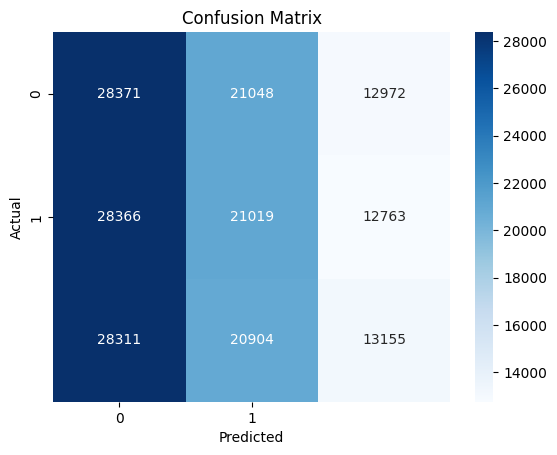

In [56]:

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Confusion Matrix

The confusion matrix helps visualise the model's performance by showing the number of correct and incorrect predictions.

## Confusion Matrix Breakdown

This matrix shows the model is preforming very poorly from the high number of misclassifications 

- If the actual class is 0, the model correctly guessed 28,371 times but also mistakenly guessed Class 1 (21,048 times) and Class 2 (12,972 times).

- If the actual class is 1, the model got it right 21,019 times, but incorrectly guessed Class 0 (28,366 times) and Class 2 (12,763 times).

- If the actual class is 2, the model guessed it right 13,155 times, but mistakenly called it Class 0 (28,311 times) or Class 1 (20,904 times).





In [57]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3346280810447865
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.45      0.38     62391
           1       0.33      0.34      0.34     62148
           2       0.34      0.21      0.26     62370

    accuracy                           0.33    186909
   macro avg       0.34      0.33      0.33    186909
weighted avg       0.34      0.33      0.33    186909



- The model is best at predicting Class 0 higher recall of 45% and worst at class 2 21%.
- Precision is nearly the same for all classes, meaning the model doesn't strongly favour one class over the others.
- The macro average and weighted average are both around 0.33, showing that performance is fairly low across all classes.

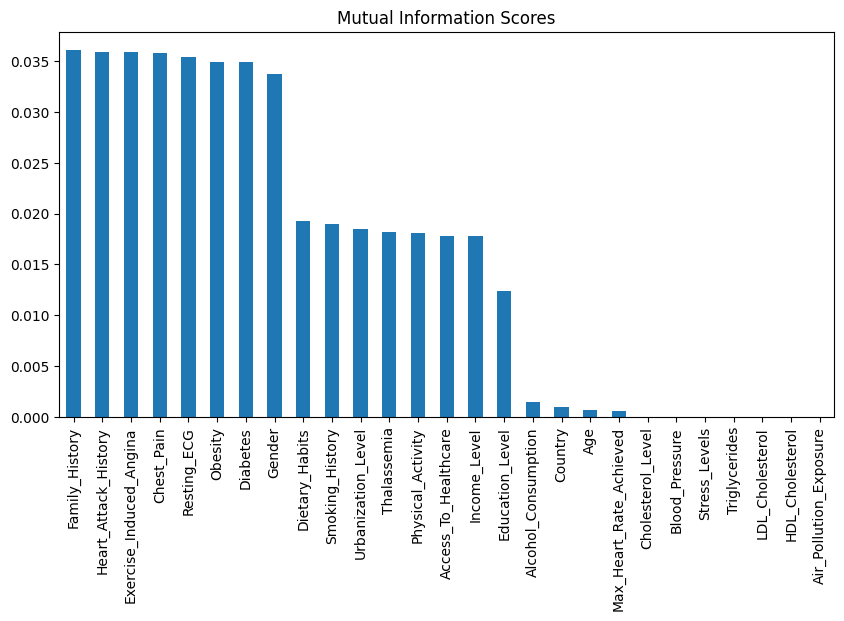

In [58]:
from sklearn.feature_selection import mutual_info_classif

# Compute Mutual Information
mi_scores = mutual_info_classif(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
mi_series.plot(kind='bar')
plt.title("Mutual Information Scores")
plt.show()


## Mutual Information (MI) Scores

Mutual Information (MI) measures how much one variable tells us about another. In this case, it shows how much each feature contributes to predicting heart disease risk

The model relies most heavily on features like Exercise-Induced Angina, Heart Attack History, Chest Pain, and Resting ECG.

Features like Air Pollution Exposure and LDL Cholesterol may not be as useful for predicting heart disease in this dataset.

In [59]:
# Grouping Columns
df['Age'] = pd.cut(df['Age'], bins=[0, 35, 60, 80, 100], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])
df['Cholesterol_Level'] = pd.cut(df['Cholesterol_Level'], bins=[0, 200, 240, 280, 320], labels=['Normal', 'Borderline High', 'High', 'Very High'])
df['Blood_Pressure'] = pd.cut(df['Blood_Pressure'], bins=[0, 120, 130, 140, 190], labels=['Normal', 'Elevated', 'High', 'Hypertensive Crisis'])
df['Alcohol_Consumption'] = pd.cut(df['Alcohol_Consumption'], bins=[0, 1, 2, 3, 4], labels=['Low', 'Moderate', 'High', 'Very High'])
df['LDL_Cholesterol'] = pd.cut(df['LDL_Cholesterol'], bins=[0, 100, 130, 160, 190], labels=['Optimal', 'Near Optimal', 'Borderline High', 'High'])
df['Triglycerides'] = pd.cut(df['Triglycerides'], bins=[0, 150, 200, 500, 1000], labels=['Normal', 'Borderline High', 'High', 'Very High'])
df['Air_Pollution_Exposure'] = pd.cut(df['Air_Pollution_Exposure'], bins=[0, 25, 50, 75, 100], labels=['Low', 'Moderate', 'High', 'Very High'])

## Grouping Columns

i Grouped nnumerical data to see if it would make a difference on predictions 

### Example with age

Young	0 - 35
Middle-aged	36 - 60
Senior	61 - 80
Elderly	81 - 100

### why?

Helps in identifying trends and patterns

In [60]:
category_columns = ['Age', 'Cholesterol_Level', 'Blood_Pressure', 'Alcohol_Consumption', 'LDL_Cholesterol', 'Triglycerides', 'Air_Pollution_Exposure']
le = LabelEncoder()

# encoding
for column in category_columns:
    df[column] = le.fit_transform(df[column])
        
        
df.head(10)

,Country,Age,Gender,Cholesterol_Level,Blood_Pressure,Smoking_History,Alcohol_Consumption,Physical_Activity,Obesity,Diabetes,...,Thalassemia,HDL_Cholesterol,LDL_Cholesterol,Triglycerides,Heart_Disease_Risk,Urbanization_Level,Air_Pollution_Exposure,Access_To_Healthcare,Education_Level,Income_Level
0,7,1,1,0,2,2,1,0,0,0,...,2,96.545522,3,0,2,2,0,1,2,1
1,5,0,1,2,1,1,4,2,1,1,...,2,92.524644,3,1,2,1,3,1,3,1
2,20,1,0,1,1,1,1,0,0,1,...,1,71.541637,2,0,1,2,0,2,2,1
3,3,3,0,3,3,1,4,0,0,1,...,1,41.990850,4,1,2,2,1,1,1,0
4,6,1,0,1,3,1,4,2,1,0,...,2,82.890209,1,1,0,0,0,1,3,1
5,14,0,1,2,3,0,4,0,1,1,...,2,55.924265,3,1,0,1,1,1,0,2
6,7,1,0,1,3,0,4,1,0,0,...,1,91.335683,2,1,0,2,3,2,1,2
7,13,2,0,2,3,0,1,0,1,1,...,1,27.525094,0,1,1,2,0,1,0,2
8,24,1,0,2,2,2,3,0,1,0,...,0,30.513106,0,2,1,1,1,2,1,2
9,3,2,0,2,2,1,4,1,0,1,...,2,85.168513,2,1,1,2,3,2,2,0


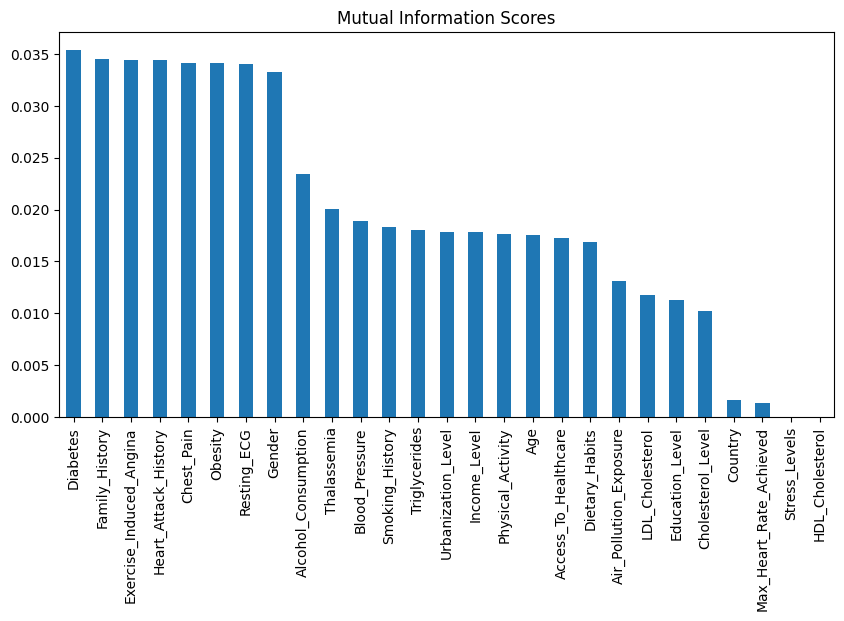

In [61]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=['Heart_Disease_Risk'])
y = df['Heart_Disease_Risk']

# Compute Mutual Information
mi_scores = mutual_info_classif(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
mi_series.plot(kind='bar')
plt.title("Mutual Information Scores")
plt.show()


## aftermath of grouping 

### Features That Became More Important:

Categorical features like Family History, Gender, and Obesity gained relevance.
Exercise-Induced Angina and Alcohol Consumption became more impactful.

### Features That Became Less Important:

Continuous variables like Age, Blood Pressure, and Cholesterol Levels lost some predictive power.
Resting ECG and Diabetes became slightly less influential.
Air Pollution Exposure remained among the least important features.

In [ ]:
# select top 5 features from mi_scores
top_features = mi_series.head(5).index
X = X[top_features]

   Diabetes  Family_History  Exercise_Induced_Angina  Heart_Attack_History  \
0         0               1                        1                     1   
1         1               0                        1                     1   
2         1               0                        1                     1   
3         1               1                        0                     1   
4         0               0                        1                     0   

   Chest_Pain  
0           1  
1           0  
2           0  
3           1  
4           1  


KNN struggles with too many features so here i grab the top five from that graph

In [65]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

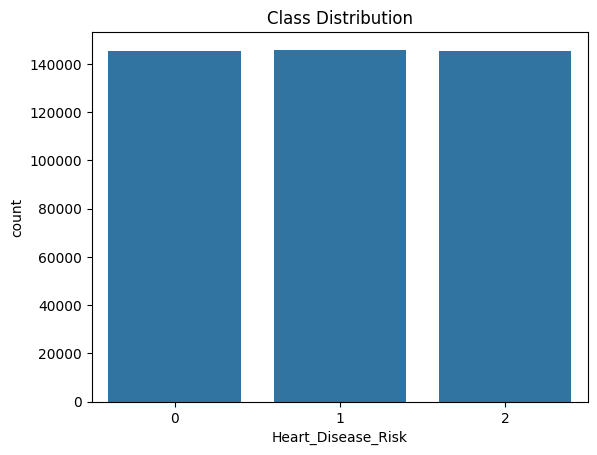

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train)
plt.title("Class Distribution")
plt.show()


This graph shows that there is no imbalance in the dataset 
SMOTE will not provide any help

In [67]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import HalvingGridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN model
knn = KNeighborsClassifier()


grid_search = HalvingGridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=3,
    factor=2,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Train the KNN model with the best parameters
knn = grid_search.best_estimator_
knn.fit(X_train_scaled, y_train)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Best Score: 0.3329572814198252


KNeighborsClassifier(metric='manhattan', n_neighbors=15)

# **HalvingGridSearchCV**

Finds the best hyperparameters for a **K-Nearest Neighbours (KNN)** model using **HalvingGridSearchCV**. Instead of testing every possible combination like GridSearchCV, it removes weaker options early to speed up the process.

## **Steps Explained**  

### **1. Setting Up the Parameter Grid**  
A dictionary (`param_grid`) lists different options for KNN:  
- **`n_neighbors`**: The number of neighbours to check \[3, 5, 7, 9, 11, 13, 15\].  
- **`weights`**: Whether all neighbours are equal (`uniform`) or closer ones matter more (`distance`).  
- **`metric`**: How distance is measured (`euclidean` or `manhattan`).  

### **2. Using HalvingGridSearchCV to Find the Best Settings**  
- `HalvingGridSearchCV` starts with all options but **removes half** (`factor=2`) in each round.  
- It tests each setting **3 times (`cv=3`)** to get a more accurate result.  
- It looks for the **best accuracy (`scoring='accuracy'`)**.  
- `n_jobs=-1` lets it run on multiple CPU cores to speed up processing.  

### **3. Training the Final KNN Model**  
- The search tests different settings and **chooses the best one** (`best_params`).  
- It prints the **best accuracy score** (`best_score`).  
- A final **KNN model** is trained using these best settings.  

## **Why Use HalvingGridSearchCV?**  
- **Much faster** than GridSearchCV because it removes weak settings early.  
- **Uses cross-validation** (`cv=3`) to avoid overfitting.  
- **Runs in parallel** (`n_jobs=-1`) to make it quicker.  


In [71]:
# Predict using the trained model
y_pred = knn.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

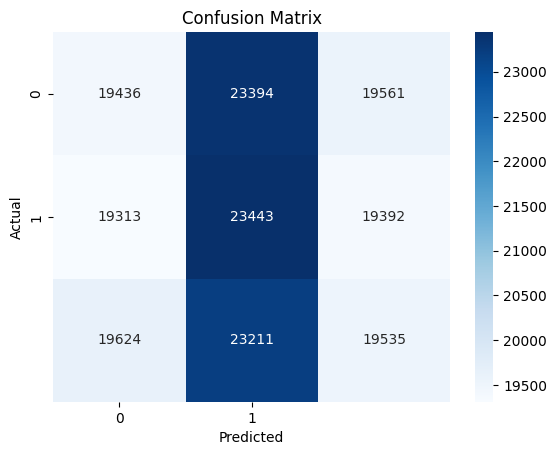

In [72]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [73]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3339272052175123
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.31      0.32     62391
           1       0.33      0.38      0.35     62148
           2       0.33      0.31      0.32     62370

    accuracy                           0.33    186909
   macro avg       0.33      0.33      0.33    186909
weighted avg       0.33      0.33      0.33    186909



In [84]:
df2 = pd.read_csv('heart_attack_predictions.csv')

df = df.drop(columns=['Heart_Disease_Risk'])

# combine high and medium risk and put into new column
df['Heart_Disease_Risk'] = df2['Heart_Disease_Risk'].replace('High', 'Medium')

# encode the target variable
df['Heart_Disease_Risk'] = le.fit_transform(df['Heart_Disease_Risk'])

X = top_features
y = df['Heart_Disease_Risk']

df.head()

,Country,Age,Gender,Cholesterol_Level,Blood_Pressure,Smoking_History,Alcohol_Consumption,Physical_Activity,Obesity,Diabetes,...,Thalassemia,HDL_Cholesterol,LDL_Cholesterol,Triglycerides,Urbanization_Level,Air_Pollution_Exposure,Access_To_Healthcare,Education_Level,Income_Level,Heart_Disease_Risk
0,7,1,1,0,2,2,1,0,0,0,...,2,96.545522,3,0,2,0,1,2,1,1
1,5,0,1,2,1,1,4,2,1,1,...,2,92.524644,3,1,1,3,1,3,1,1
2,20,1,0,1,1,1,1,0,0,1,...,1,71.541637,2,0,2,0,2,2,1,0
3,3,3,0,3,3,1,4,0,0,1,...,1,41.990850,4,1,2,1,1,1,0,1
4,6,1,0,1,3,1,4,2,1,0,...,2,82.890209,1,1,0,0,1,3,1,1


# Combining High and Medium Risk

model was struggled with classification when all three classes were separate so I tried megring high and medium

In [87]:
# Select the top features from the DataFrame
X = df[top_features]

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# What is SMOTE?

Synthetic Minority Over-sampling Technique (SMOTE) is a resampling method used to handle class imbalance in datasets. It works by generating synthetic samples for the minority class instead of just duplicating existing instances. This helps balance the dataset and improves model performance on underrepresented classes.

# Why Use SMOTE?

- Helps balance the dataset by generating synthetic examples.

- Improves the model's ability to detect minority class instances.

- Reduces overfitting compared to simple oversampling methods.

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import HalvingGridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN model
knn = KNeighborsClassifier()


grid_search = HalvingGridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=3,
    factor=4,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")


In [ ]:

# Scale the data after applying SMOTE
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model with the best parameters
knn = grid_search.best_estimator_
knn.fit(X_train_scaled, y_train)

In [ ]:
# Predict using the trained model
y_pred = knn.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

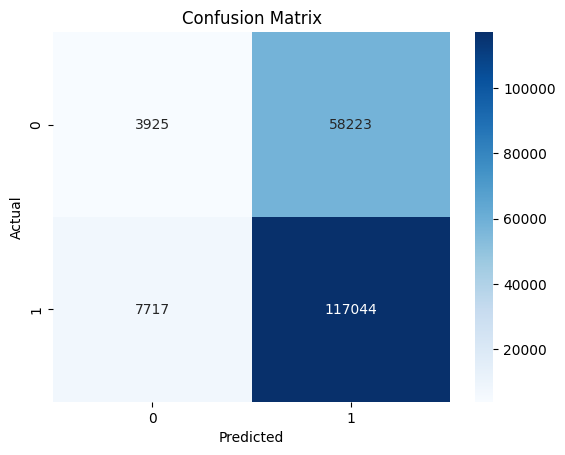

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6472079996147858
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.06      0.11     62148
           1       0.67      0.94      0.78    124761

    accuracy                           0.65    186909
   macro avg       0.50      0.50      0.44    186909
weighted avg       0.56      0.65      0.56    186909

